# Introduction to Geospatial Vector Data

This notebook contains simple code snippets with which the basic capabilities of [GeoPandas](https://geopandas.org/en/stable/) are shown.

Look at the companion guide: [`README.md`](../README.md).

Table of contents:

1. A
2. B

## 1. Introduction to Geospatial Vector Data

The datasets are located here:

In [7]:
DATA_PATH_PARIS = '../../data/work_geodata/Paris/'

### 1.1 Plotting: Scatterplots with Background

In [2]:
import pandas as pd
import geopandas as gpd
import contextily
import matplotlib.pyplot as plt

/Users/mxagar/opt/anaconda3/envs/ds/lib/python3.7/site-packages/requests/__init__.py:114: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  RequestsDependencyWarning,
/Users/mxagar/opt/anaconda3/envs/ds/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
restaurants = pd.read_csv(DATA_PATH_PARIS+"paris_restaurants.csv")

In [9]:
restaurants.head()

,type,x,y
0,European restuarant,259641.691646,6.251867e+06
1,Traditional French restaurant,259572.339603,6.252030e+06
2,Traditional French restaurant,259657.276374,6.252143e+06
3,Indian / Middle Eastern restaurant,259684.438330,6.252203e+06
4,Traditional French restaurant,259597.943086,6.252230e+06


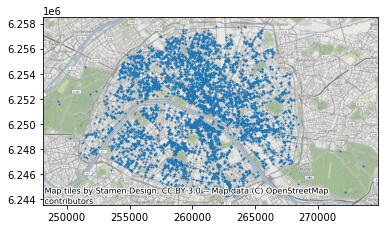

In [10]:
# To add a background map: contextily
# It automatically downloads the tile of the required region
# But the X & Y or Long & Lat need to be correct
fig, ax = plt.subplots()
ax.plot(restaurants.x, restaurants.y, 'o', markersize=1)
contextily.add_basemap(ax)

### 1.2 GeoPandas Basics

In [13]:
# Read the Paris districts dataset: GeoPackage file / GeoJSON file
districts = gpd.read_file(DATA_PATH_PARIS+'paris_districts_utm.geojson')

In [17]:
# Inspect the first rows
districts.head()

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5..."
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5..."
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5..."
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5..."


<AxesSubplot:>

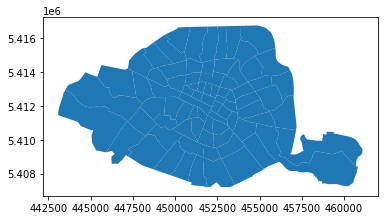

In [16]:
# Make a quick visualization of the districts
districts.plot()

In [18]:
type(districts)

geopandas.geodataframe.GeoDataFrame

In [19]:
type(districts.geometry)

geopandas.geoseries.GeoSeries

In [21]:
# Inspect the area of the districts
districts.geometry.area

0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64

#### Convert CSV to GeoPandas

In [22]:
df = pd.read_csv(DATA_PATH_PARIS+"paris_restaurants.csv")

In [26]:
restaurants = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.x, df.y))